In [1]:
import pandas as pd
import geopandas as gp
import shapely as shp
import sys

sys.path.append('..')
import utils.close_holes

world_admin0_raw = gp.read_file("./tmp/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")
world_12nm_raw = gp.read_file("./tmp/World_12NM_v4_20231025/eez_12nm_v4.shp")
treaty_members = pd.read_csv("./data/pelindaba_members.csv")

<Axes: >

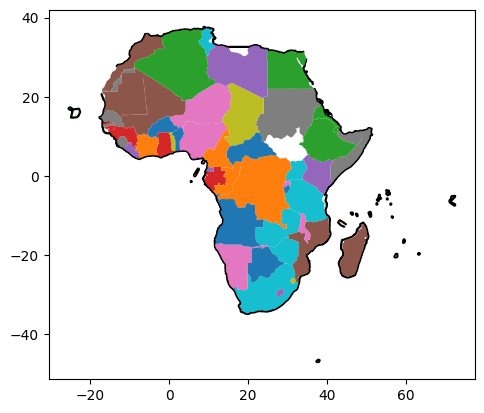

In [2]:
world_admin0 = world_admin0_raw.set_crs(epsg=4326)
world_12nm = world_12nm_raw.set_crs(epsg=4326)

treaty_12nm = world_12nm.loc[
    	(world_12nm["ISO_SOV1"].isin(list(treaty_members["code"])))
    ].reset_index()

treaty_land = world_admin0.loc[
    (world_admin0["SOV_A3"].isin(list(treaty_members["code"])))
    ].reset_index()

ax = treaty_12nm.plot(color="none", edgecolor="black")
treaty_land.plot(ax=ax,column="SOV_A3", legend=False)

<Axes: >

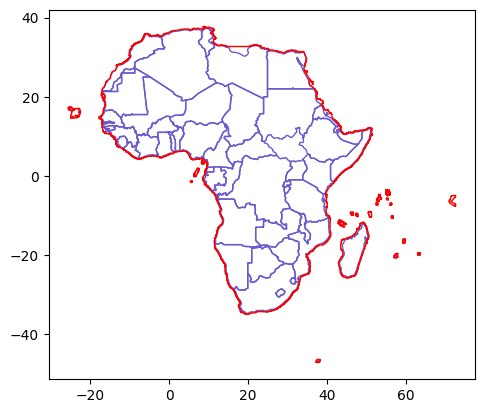

In [3]:
# Build treaty extent geometry 
treaty_geo = shp.union_all(
    [*list(treaty_12nm.geometry), *list(treaty_land.geometry)],
    grid_size=.01)

treaty_extent = gp.GeoDataFrame(
    data={"geometry": [treaty_geo]},
    geometry="geometry",
    crs="EPSG:4326",
)

treaty_extent.geometry = treaty_extent.geometry.apply(lambda x: utils.close_holes.close_holes(x))

treaty_extent.to_file("./tmp/pelindaba-extent.geojson")

ax = treaty_land.plot(color="none", edgecolor="slateblue")
treaty_extent.plot(ax=ax, color="none", edgecolor="red", lw=1)